In [13]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [14]:
df = pd.read_csv("BMW_sales.csv")

In [15]:

#Primeras filas
print("     Head \n", df.head())
#Ultimas filas
print("     Tail \n", df.tail())
#Dimenesiones
print("     Shape  \n", df.shape)
#Columnas
print("     Columns  \n", df.columns)
#Tipos de datos
print("     DyTypes  \n", df.dtypes)
#Resumen general
print("     Info  \n", df.info())
#Estadísticas básicas   
print("     Describe  \n", df.describe())


     Head 
       Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  
     Tail 
           Model  Year         Region   Color Fuel_Type Transmission  \
49995        i3  2014           Asia     Red  

In [16]:

##Calidad de datos
#Nulos
print("     Null  \n", df.isnull().sum())
#Duplicados
print("     Duplicated  \n", df.duplicated().sum())
#Cuales son los duplicados
print("     Duplicated  \n", df[df.duplicated()])
#Manipulación básica
print("     []  \n", df["Model"])


     Null  
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64
     Duplicated  
 0
     Duplicated  
 Empty DataFrame
Columns: [Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume, Sales_Classification]
Index: []
     []  
 0        5 Series
1              i8
2        5 Series
3              X3
4        7 Series
           ...   
49995          i3
49996          i3
49997    5 Series
49998          i3
49999          X1
Name: Model, Length: 50000, dtype: object


In [17]:
#Transform into a summary table
model_sale_region = heatmap_data = df.groupby(['Region', 'Model'])['Sales_Volume'].sum().unstack()

print(model_sale_region)

           Region     Model  Sales_Volume
0          Africa  3 Series       3892595
1          Africa  5 Series       4020702
2          Africa  7 Series       3699471
3          Africa        M3       3448709
4          Africa        M5       3676252
..            ...       ...           ...
61  South America        X3       3699923
62  South America        X5       3609906
63  South America        X6       4023804
64  South America        i3       3760040
65  South America        i8       3920908

[66 rows x 3 columns]


In [18]:
#Best seller index
idx = model_sale_region.groupby('Region')['Sales_Volume'].idxmax()

best_seller = model_sale_region.loc[idx]

print(tabulate(best_seller))

--  -------------  --------  -------
 1  Africa         5 Series  4020702
16  Asia           X1        4192289
32  Europe         i8        4202401
35  Middle East    7 Series  4080751
46  North America  7 Series  4087259
63  South America  X6        4023804
--  -------------  --------  -------


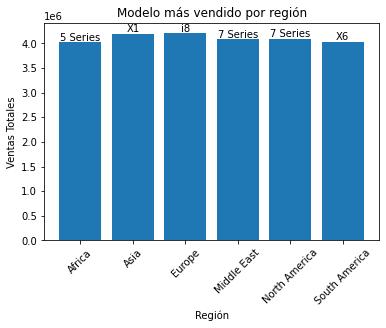

In [23]:
plt.figure()

plt.bar(best_seller['Region'], best_seller['Sales_Volume'])

for i in range(len(best_seller)):
    plt.text(i, 
             best_seller['Sales_Volume'].iloc[i],
             best_seller['Model'].iloc[i],
             ha='center',
             va='bottom')

plt.title('Modelo más vendido por región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')

plt.xticks(rotation=45)

plt.show()